In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.DataFrame.from_records(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.053001,-1.470007,0.104117,-1.457770
1,-1.499523,-1.182199,0.330607,0.433575
2,-0.384831,-0.045553,-0.995128,0.553787
3,1.251903,0.018306,-0.881204,0.239230
4,-0.875334,1.016988,0.594429,-0.149192
5,0.171724,-0.098421,-1.634406,1.849097
6,0.441208,-0.323845,1.434284,-0.735001
7,-0.317843,1.674805,-0.280484,-0.786436
8,0.210568,-0.984078,-0.077481,-0.590071
9,-0.781282,0.510765,1.342112,0.200317


In [3]:
df['cell'] = df.index

In [4]:
long = df.melt(id_vars=['cell'])

In [5]:
long

,cell,variable,value
0,0,0,-0.053001
1,1,0,-1.499523
2,2,0,-0.384831
3,3,0,1.251903
4,4,0,-0.875334
5,5,0,0.171724
6,6,0,0.441208
7,7,0,-0.317843
8,8,0,0.210568
9,9,0,-0.781282


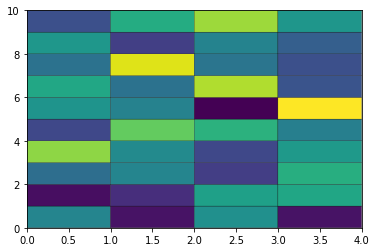

In [6]:
plt.pcolor(df.drop('cell', 1), edgecolor='k');

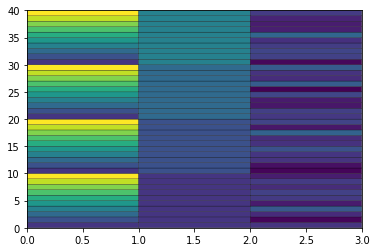

In [7]:
plt.pcolor(long.values.astype(float), edgecolor='k')

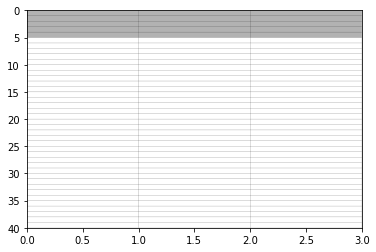

In [8]:
M = long.values.astype(float) * 0
M[:5,:] = 1
plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )
plt.gca().invert_yaxis();

In [9]:
long.iloc[:5]

,cell,variable,value
0,0,0,-0.053001
1,1,0,-1.499523
2,2,0,-0.384831
3,3,0,1.251903
4,4,0,-0.875334


In [17]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

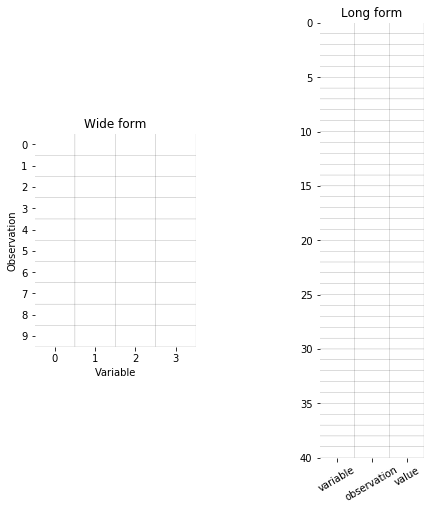

In [75]:
figsize(8, 8)

plt.subplot2grid((8, 8), (2, 0), colspan=3, rowspan=4)

M = df.drop('cell', 1) * 0

plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )

plt.gca().invert_yaxis();

plt.xticks(np.arange(4) + 0.5, np.arange(4));
plt.yticks(np.arange(10) + 0.5, np.arange(10));

plt.xlabel('Variable')
plt.ylabel('Observation');

plt.title('Wide form')

plt.subplot2grid((8, 8), (0, 5), colspan=2, rowspan=8)

M = long_s.values.astype(float) * 0

plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )
plt.gca().invert_yaxis();

plt.xticks(np.arange(3) + 0.5, ['variable', 'observation', 'value'], rotation=30);

plt.title('Long form');

In [111]:
batch_size = 7
k = 0

def plot_batch_training(k):
    figsize(8, 8)

    plt.subplot2grid((8, 12), (2, 0), colspan=3, rowspan=4)

    M = df.drop('cell', 1) * 0
    for i, j in zip(long.iloc[k * batch_size:(k + 1) * batch_size].cell,
                    long.iloc[k * batch_size:(k + 1) * batch_size].variable):
        M.loc[i, j] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )

    plt.gca().invert_yaxis();

    plt.xticks(np.arange(4) + 0.5, np.arange(4));
    plt.yticks(np.arange(10) + 0.5, np.arange(10));

    plt.xlabel('Variable')
    plt.ylabel('Observation');

    plt.title('Wide form')

    plt.subplot2grid((8, 12), (0, 5), colspan=2, rowspan=8)

    M = long_s.values.astype(float) * 0
    M[k * batch_size:(k + 1) * batch_size,:] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )
    plt.gca().invert_yaxis();

    plt.xticks(np.arange(3) + 0.5, ['variable', 'observation', 'value'], rotation=90);

    plt.title('Long form');

    plt.subplot2grid((8, 12), (4, 9), colspan=2, rowspan=1)

    M = np.zeros((1, 4))
    for i, j in zip(long.iloc[k * batch_size:(k + 1) * batch_size].cell,
                    long.iloc[k * batch_size:(k + 1) * batch_size].variable):
        M[0, j] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Reds, alpha=0.3, )
    plt.xticks(np.arange(4) + 0.5, np.arange(4));
    plt.yticks([])
    plt.title('Weights')

    plt.subplot2grid((8, 12), (2, 11), colspan=1, rowspan=4)

    M = np.zeros((10, 1))
    for i, j in zip(long.iloc[k * batch_size:(k + 1) * batch_size].cell,
                    long.iloc[k * batch_size:(k + 1) * batch_size].variable):
        M[i, 0] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Reds, alpha=0.3, )
    plt.xticks([])
    plt.yticks(np.arange(10) + 0.5, np.arange(10));
    plt.gca().invert_yaxis();

    plt.title('PC1')

    plt.tight_layout()

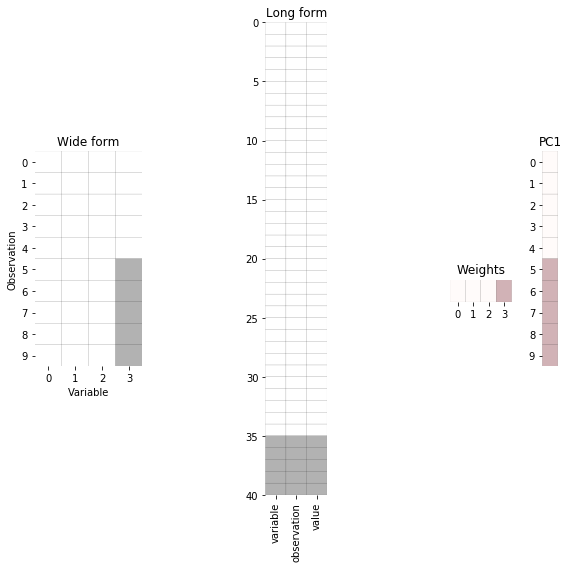

In [119]:
for k in range(6):
    plot_batch_training(k)
    plt.savefig('batches_long/{}.png'.format(k))

In [120]:
long_s = long.sample(frac=1)

In [138]:
batch_size = 7
k = 0

def plot_shuffled_batch_training(k):
    figsize(8, 8)

    plt.subplot2grid((8, 12), (2, 0), colspan=3, rowspan=4)

    M = df.drop('cell', 1) * 0
    for i, j in zip(long_s.iloc[k * batch_size:(k + 1) * batch_size].cell,
                    long_s.iloc[k * batch_size:(k + 1) * batch_size].variable):
        M.loc[i, j] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )

    plt.gca().invert_yaxis();

    plt.xticks(np.arange(4) + 0.5, np.arange(4));
    plt.yticks(np.arange(10) + 0.5, np.arange(10));

    plt.xlabel('Variable')
    plt.ylabel('Observation');

    plt.title('Wide form')

    plt.subplot2grid((8, 12), (0, 5), colspan=2, rowspan=8)

    M = long_s.values.astype(float) * 0
    M[k * batch_size:(k + 1) * batch_size,:] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )
    plt.gca().invert_yaxis();

    plt.xticks(np.arange(3) + 0.5, ['variable', 'observation', 'value'], rotation=90);

    plt.title('Long form\n(Shuffled)');

    plt.subplot2grid((8, 12), (4, 9), colspan=2, rowspan=1)

    M = np.zeros((1, 4))
    for i, j in zip(long_s.iloc[k * batch_size:(k + 1) * batch_size].cell,
                    long_s.iloc[k * batch_size:(k + 1) * batch_size].variable):
        M[0, j] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Reds, alpha=0.3, vmin=0, vmax=1)
    plt.xticks(np.arange(4) + 0.5, np.arange(4));
    plt.yticks([])
    plt.title('Weights')

    plt.subplot2grid((8, 12), (2, 11), colspan=1, rowspan=4)

    M = np.zeros((10, 1))
    for i, j in zip(long_s.iloc[k * batch_size:(k + 1) * batch_size].cell,
                    long_s.iloc[k * batch_size:(k + 1) * batch_size].variable):
        M[i, 0] = 1

    plt.pcolor(M, edgecolor='k', cmap=cm.Reds, alpha=0.3, vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks(np.arange(10) + 0.5, np.arange(10));
    plt.gca().invert_yaxis();

    plt.title('PC1')

    plt.tight_layout()

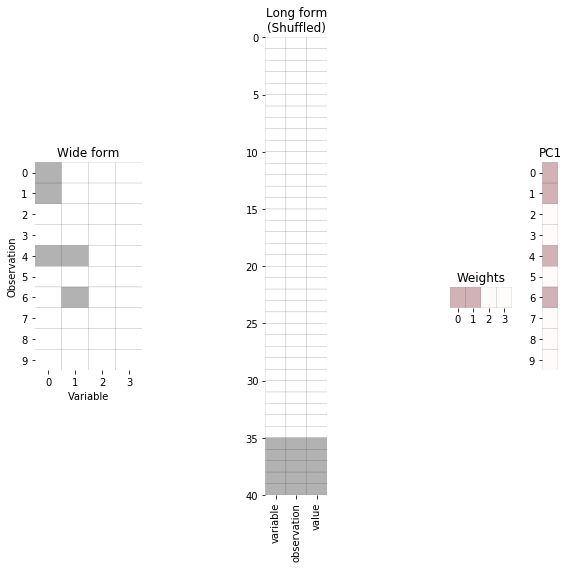

In [139]:
for k in range(6):
    plot_shuffled_batch_training(k)
    plt.savefig('shuffled_batches_long/{}.png'.format(k), bbox_inches='tight')

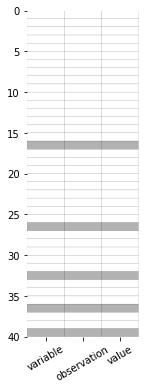

In [60]:
figsize(2, 6)

M = long_s.values.astype(float) * 0
M[long_s.iloc[:5].index,:] = 1
plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )
plt.gca().invert_yaxis();

plt.xticks(np.arange(3) + 0.5, ['variable', 'observation', 'value'], rotation=30);

In [66]:
batch_size = 7
k = 1

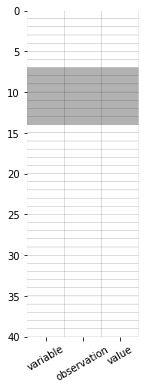

In [67]:
figsize(2, 6)

M = long_s.values.astype(float) * 0
M[k * batch_size:(k + 1) * batch_size,:] = 1
plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )
plt.gca().invert_yaxis();

plt.xticks(np.arange(3) + 0.5, ['variable', 'observation', 'value'], rotation=30);

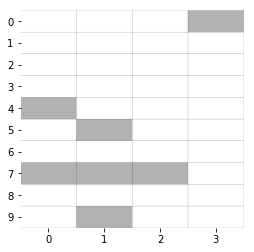

In [56]:
figsize(4, 4)

M = df.drop('cell', 1) * 0
for i, j in zip(long_s.iloc[k * batch_size:(k + 1) * batch_size].cell,
                long_s.iloc[k * batch_size:(k + 1) * batch_size].variable):
    M.loc[i, j] = 1

plt.pcolor(M, edgecolor='k', cmap=cm.Greys, alpha=0.3, )
plt.gca().invert_yaxis();

plt.xticks(np.arange(4) + 0.5, np.arange(4));
plt.yticks(np.arange(10) + 0.5, np.arange(10));